<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

* [`Hosp_visits_monthly.csv`](./projects/project_1/data/Healthcare/Hosp_visits_monthly.csv): Hospital admissions in monthly
* [`Hospital_visits.xlsx`](./projects/project_1/data/Healthcare/Hospital_visits.xlsx): Hospital admissions in yearly
* [`Mortality_rate.xlsx`](./projects/project_1/data/Healthcare/Mortality_rate.xlsx): Death and life expectancy of various categories
* [`historical-24-hr-psi.csv`](./projects/project_1/data/Healthcare/historical-24-hr-psi.csv): Historical data of PSI levels at different regions in Singapore

## Problem Statement

_We are a group of data scientists working for the Singapore Health Promotion Board who is responsible for developing and organising health promotion and disease prevention programmes. The Health Promotion Board aims to empower Singaporeans to attain optimal health, increase the quality and years of healthy life and prevent illness, disability and premature death._

_We have been tasked by Health Promotion Board to explore if rainy seasons has a correlation with mortality rate and hospital visits. This would allow Health Promotion Board to make informed decisions and develop targeted interventions during rainy seasons to address any potential health risks. By understanding the relationship between rainy seasons and mortality rates or hospital visits, the Health Promotion Board can implement preventive measures, allocate resources effectively, and develop appropriate health promotion campaigns._

### Outside Research

Ambient air pollution presents a significant risk to global health, contributing to the development of both acute and chronic diseases. It poses serious threats to populations worldwide. Studies using time-series data have demonstrated the detrimental impact of air pollution on cardiovascular and respiratory mortality in Asia. These findings have significant implications for public health and underscore the urgent need to address air quality issues in the region. ([*source*](https://www.mdpi.com/2073-4433/11/1/9))

Rain can have an impact on air quality. Rainfall can help improve air quality by acting as a natural cleanser that helps remove pollutants from the atmosphere. 
While rain can temporarily improve air quality by removing pollutants, long-term solutions such as reducing pollutant emissions, improving air pollution control measures, and promoting sustainable practices are essential for addressing air quality challenges effectively.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def calculate_mean(values):
    n = len(values)
    total = sum(values)
    mean = total / n
    return mean

# Test the function
data = [1, 2, 3, 4, 5]
mean_value = calculate_mean(data)
print(mean_value)

3.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def calculate_std_dev(values):
    n = len(values)
    mean = sum(values) / n
    sum_squares = sum((x - mean) ** 2 for x in values)
    std_dev = (sum_squares / n) ** 0.5
    return std_dev

# Test the function
data = [1, 2, 3, 4, 5]
std_deviation = calculate_std_dev(data)
print(std_deviation)

1.4142135623730951


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# pip install openpyxl

In [4]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### Reading of files 

In [5]:
# Read files
no_of_rainy_days = pd.read_csv("../data/Healthcare/rainfall-monthly-number-of-rain-days.csv")
total_rain = pd.read_csv("../data/Healthcare/rainfall-monthly-total.csv")
psi = pd.read_csv("../data/Healthcare/historical-24-hr-psi.csv")
hosp_visits_monthly = pd.read_csv("../data/Healthcare/Hosp_visits_monthly.csv")

# Assigning these files to monthly
no_of_rainy_days_monthly = no_of_rainy_days
total_rain_monthly = total_rain 
psi_monthly = psi

# Read specific rows from sheet 5 of the Excel file
death_by_causes = pd.read_excel('../data/Healthcare/Mortality_rate.xlsx', sheet_name=5, skiprows=10, nrows=24)
# Read specific rows from sheet 6 of the Excel file
death_by_age = pd.read_excel('../data/Healthcare/Mortality_rate.xlsx', sheet_name=6, skiprows=10, nrows=76)
# Read specific rows of the Excel file
hospital_visits = pd.read_excel('../data/Healthcare/Hospital_visits.xlsx', skiprows=2, nrows=22)


### Cleaning monthly datasets

In [6]:
no_of_rainy_days_monthly.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [7]:
total_rain_monthly.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


#### Cleaning of psi_monthly

In [8]:
psi_monthly['24-hr_psi'] = pd.to_datetime(psi_monthly['24-hr_psi']) # Changing to datetime type
psi_monthly['month'] = psi_monthly['24-hr_psi'].dt.month # Creating a new column with the months
psi_monthly['year'] = psi_monthly['24-hr_psi'].dt.year #Creating a new column with the years
psi_monthly['month'] = psi_monthly['year'].astype(str) + '-' + psi_monthly['month'].astype(str).str.zfill(2) # Combining Year-Month into month column
psi_monthly = psi_monthly.sort_values('month') # Sorting the order of the month
psi_monthly = psi_monthly.groupby('month').mean(numeric_only = True) # Grouping into month per row
psi_monthly = psi_monthly.drop('year', axis=1) # Drop year column
psi_monthly = psi_monthly.reset_index() # Remove index
psi_monthly.head()

,month,north,south,east,west,central
0,2014-01,55.451163,53.111628,51.637209,56.804651,53.869767
1,2014-02,58.305556,55.680556,55.592593,59.268519,56.879630
2,2014-03,63.467593,62.490741,60.041667,65.578704,61.305556
3,2014-04,63.087963,59.631173,60.220679,61.885802,60.941358
4,2014-05,56.236607,51.708333,51.205357,54.287202,53.367560


#### Cleaning of hosp_visits_monthly

In [9]:
# Dropping rows
hosp_visits_monthly = hosp_visits_monthly.drop(hosp_visits_monthly.index[0:8].append(hosp_visits_monthly.index[447:]))

# Reset the index after dropping rows
hosp_visits_monthly = hosp_visits_monthly.reset_index(drop=True) # Remove index
hosp_visits_monthly.columns = hosp_visits_monthly.iloc[0] # Using column[0] as column
hosp_visits_monthly = hosp_visits_monthly[1:] # Removing first row
hosp_visits_monthly = hosp_visits_monthly.iloc[:, :2] # Removing all columns except column [0]
hosp_visits_monthly = hosp_visits_monthly.rename(columns={'Public Sector Hospital Admissions (Number)': 'public_admissions'}) # Shortening the column name
hosp_visits_monthly = hosp_visits_monthly.rename(columns={'Data Series': 'month'}) # Giving the month column a name
hosp_visits_monthly.sort_index(ascending = False, inplace = True) # Sorting the order
hosp_visits_monthly = hosp_visits_monthly.drop(hosp_visits_monthly.index[0:1]) # Dropping first row
hosp_visits_monthly['month'] = pd.to_datetime(hosp_visits_monthly['month']).dt.strftime('%Y-%m') # Changing date to 1987-01 format

hosp_visits_monthly.head()

,month,public_admissions
437,1987-01,18822
436,1987-02,19074
435,1987-03,22173
434,1987-04,19797
433,1987-05,19602


### Cleaning yearly datasets

In [10]:
# Code: Display

# Convert the 'Datetime' column to datetime type
no_of_rainy_days['datetime'] = pd.to_datetime(no_of_rainy_days['month'])

# Extract the year information from the 'Datetime' column
no_of_rainy_days['year'] = no_of_rainy_days['datetime'].dt.year

# Sum the data by years
no_of_rainy_days_yearly = no_of_rainy_days.groupby('year').sum(numeric_only = True)
no_of_rainy_days_yearly = no_of_rainy_days_yearly.reset_index() # Reset the index

no_of_rainy_days_yearly.head()

,year,no_of_rainy_days
0,1982,130
1,1983,145
2,1984,191
3,1985,181
4,1986,174


In [11]:
no_of_rainy_days_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              41 non-null     int64
 1   no_of_rainy_days  41 non-null     int64
dtypes: int64(2)
memory usage: 784.0 bytes


In [12]:
# Convert the 'Datetime' column to datetime type
total_rain['datetime'] = pd.to_datetime(total_rain['month'])

# Extract the year information from the 'Datetime' column
total_rain['year'] = total_rain['datetime'].dt.year

# Sum the data by years
total_rain_yearly = total_rain.groupby('year').sum(numeric_only = True)
total_rain_yearly = total_rain_yearly.reset_index() # Reset the index


total_rain_yearly.head()

,year,total_rainfall
0,1982,1581.7
1,1983,1993.7
2,1984,2686.7
3,1985,1483.9
4,1986,2536.1


In [13]:
total_rain_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            41 non-null     int64  
 1   total_rainfall  41 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 784.0 bytes


In [14]:
# Convert the 'Datetime' column to datetime type
psi['datetime'] = pd.to_datetime(psi['24-hr_psi'])

# Extract the year information from the 'Datetime' column
psi['year'] = psi['datetime'].dt.year

# Mean the data by years
psi_yearly = psi.groupby('year').mean(numeric_only = True)
psi_yearly = psi_yearly.reset_index() # Reset the index

psi_yearly.head()

,year,north,south,east,west,central
0,2014,56.412638,54.805274,54.801637,57.248674,54.194726
1,2015,62.502740,62.880822,62.933333,65.582991,58.274087
2,2016,53.841075,51.736339,50.436362,49.148110,50.490323
3,2017,52.183333,50.879338,50.023973,46.142922,47.094863
4,2018,52.567237,53.880023,51.160388,47.656164,52.549087


In [15]:
psi_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     9 non-null      int64  
 1   north    9 non-null      float64
 2   south    9 non-null      float64
 3   east     9 non-null      float64
 4   west     9 non-null      float64
 5   central  9 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 560.0 bytes


#### Cleaning of death_by_causes

In [16]:
# Display the DataFrame
death_by_causes = death_by_causes.T  # Transposing for readability
death_by_causes.columns = death_by_causes.iloc[0] # Replacing column header with first row
death_by_causes = death_by_causes[1:] # Removing first row
death_by_causes.columns = death_by_causes.columns.str.lower() # Lowercasing the column headers
death_by_causes = death_by_causes.sort_index() # Sorting the years in ascending order
death_by_causes = death_by_causes.replace('na', np.nan) # Replacing Str of NaN into NaN
death_by_causes.columns.name = None # Renaming index to year
death_by_causes = death_by_causes.reset_index()
death_by_causes = death_by_causes.rename(columns={'index': 'year'})
death_by_causes = death_by_causes[['year', '  diseases of the respiratory system']]
death_by_causes = death_by_causes.rename(columns={'  diseases of the respiratory system': 'respiratory_deaths'})
death_by_causes['year'] = death_by_causes['year'].astype(int)
death_by_causes.head()

,year,respiratory_deaths
0,1969,1235
1,1970,1473
2,1971,1502
3,1972,1653
4,1973,1663


In [17]:
death_by_causes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                54 non-null     int64
 1   respiratory_deaths  54 non-null     int64
dtypes: int64(2)
memory usage: 992.0 bytes


#### Cleaning of death_by_age

In [18]:
death_by_age = death_by_age.T  # Transposing for readability
death_by_age.columns = death_by_age.iloc[0] # Replacing column header with first row
death_by_age = death_by_age[1:] # Removing first row
death_by_age.columns = death_by_age.columns.str.lower() # Lowercasing the column headers
death_by_age = death_by_age.sort_index() # Sorting the years in ascending order
death_by_age = death_by_age.replace('-', np.nan) # Replacing Str of NaN into NaN
death_by_age = death_by_age.replace('na', np.nan) # Replacing Str of NaN into NaN
death_by_age.columns.name = None # Renaming index to year
death_by_age = (death_by_age.iloc[:,0]) # Selecting the death rate column only
death_by_age = death_by_age.reset_index() # Reset the index
death_by_age = death_by_age.rename(columns={'index': 'year'}) # Naming the first column
death_by_age['year'] = death_by_age['year'].astype(int)  # Changing year to type(int)
death_by_age = death_by_age.rename(columns={'total age specific death rate': 'total_death_rate'}) # shorten and snake case the column
death_by_age.head()

,year,total_death_rate
0,1960,6.2
1,1961,5.9
2,1962,5.8
3,1963,5.6
4,1964,5.7


In [19]:
death_by_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              63 non-null     int64  
 1   total_death_rate  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


#### Cleaning of hospital_visits, splitting it into various Dataframes of each categories

In [20]:
# Raw dataframe of hospital_visits
hospital_visits.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019p,2020p
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,·,Hospital Admissions 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Acute Hospitals 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,·,Admissions,NaN,NaN,NaN,400636.0,413205.0,412200.0,...,446384.0,459902.0,474193.0,489574.0,499889.0,546256.0,568117.0,584819.0,618136.0,556511.0


In [21]:
# Adding headers to each segment of dataframe
hospital_visits.iloc[4, 5] = 'total_admissions'

# Dropping unnecessary rows and columns
hospital_visits = hospital_visits.drop(hospital_visits.columns[:5], axis=1)
hospital_visits = hospital_visits.drop(hospital_visits.columns[1], axis=1)
hospital_visits = hospital_visits.drop(hospital_visits.index[:4], axis=0)

In [22]:
# Spliting the dataFrame based on index
total_visits = hospital_visits[:1]

In [23]:
# Further cleaning of each dataframes
total_visits = total_visits.T  # Transposing for readability
total_visits.columns = total_visits.iloc[0] # Replacing column header with first row
total_visits = total_visits[1:] # Removing first row
total_visits.columns.name = None # Renaming index to None
total_visits = total_visits.rename(index={'2019p': '2019', '2020p': '2020'}) # Renaming weird names
total_visits['total_admissions'] = total_visits['total_admissions'].astype(int) # Converting elements into floats
total_visits = total_visits.reset_index() # Reset the index
total_visits = total_visits.rename(columns={'index': 'year'}) # Naming the first column
hospital_visits = total_visits # Assigning back to original dataframe
hospital_visits['year'] = hospital_visits['year'].astype(int) # Converting from object to integer
hospital_visits.head()

,year,total_admissions
0,2006,400636
1,2007,413205
2,2008,412200
3,2009,413592
4,2010,427305


In [24]:
hospital_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              15 non-null     int64
 1   total_admissions  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


### Merging and Exporting

In [25]:
monthly_df = pd.merge(hosp_visits_monthly, total_rain_monthly, on = 'month').merge(no_of_rainy_days_monthly, on = 'month').merge(psi_monthly, on = 'month')
monthly_df.shape
monthly_df.head()

,month,public_admissions,total_rainfall,datetime_x,year_x,no_of_rainy_days,datetime_y,year_y,north,south,east,west,central
0,2014-01,32050,75.4,2014-01-01,2014,5,2014-01-01,2014,55.451163,53.111628,51.637209,56.804651,53.869767
1,2014-02,28424,0.2,2014-02-01,2014,1,2014-02-01,2014,58.305556,55.680556,55.592593,59.268519,56.879630
2,2014-03,31853,66.0,2014-03-01,2014,6,2014-03-01,2014,63.467593,62.490741,60.041667,65.578704,61.305556
3,2014-04,31819,110.0,2014-04-01,2014,17,2014-04-01,2014,63.087963,59.631173,60.220679,61.885802,60.941358
4,2014-05,32531,125.8,2014-05-01,2014,18,2014-05-01,2014,56.236607,51.708333,51.205357,54.287202,53.367560


In [26]:
# Merging back to original Dataframe
merged_df = pd.merge(hospital_visits, death_by_age, on = 'year').merge(death_by_causes, on = 'year').merge(total_rain_yearly, on = 'year').merge(no_of_rainy_days_yearly, on = 'year').merge(psi_yearly, on = 'year')
merged_df.shape
merged_df.head()

,year,total_admissions,total_death_rate,respiratory_deaths,total_rainfall,no_of_rainy_days,north,south,east,west,central
0,2014,489574,4.7,4232,1538.4,152,56.412638,54.805274,54.801637,57.248674,54.194726
1,2015,499889,4.8,4417,1267.1,125,62.502740,62.880822,62.933333,65.582991,58.274087
2,2016,546256,4.8,4440,1955.7,179,53.841075,51.736339,50.436362,49.148110,50.490323
3,2017,568117,5.0,4757,2045.6,204,52.183333,50.879338,50.023973,46.142922,47.094863
4,2018,584819,5.0,4909,1708.2,188,52.567237,53.880023,51.160388,47.656164,52.549087


In [27]:
# Export cleaned table to CSV
merged_df.to_csv("../data/Healthcare/merged_df.csv")
monthly_df.to_csv("../data/Healthcare/monthly_df.csv")


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.



|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rain|float|rainfall-monthly-total|Total rainfall in mm| 
|no_of_rainy_days|integer|rainfall-monthly-number-of-rain|Number of rainy days on the month|
|psi|integer|historical-24-hr-psi|Mean levels of PSI at different regions per year|
|death_by_age|float|Mortality_rate|Rate of death per 1,000 residents|
|death_by_causes|integer|Mortality_rate|Total number of deaths due to respiratory diseases|
|total_visits|int|Hospital_visits|Total number of admissions per year|




## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [28]:
# Summary statistic
merged_df.describe()

,year,total_admissions,total_death_rate,respiratory_deaths,total_rainfall,no_of_rainy_days,north,south,east,west,central
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2017.000000,551900.285714,4.928571,4616.714286,1681.300000,163.714286,53.317354,53.437247,52.499579,50.640140,51.414340
std,2.160247,45417.782493,0.170434,269.781216,300.370338,32.138836,5.527521,5.327343,5.589176,8.625713,4.573847
min,2014.000000,489574.000000,4.700000,4232.000000,1267.100000,120.000000,44.141052,45.189208,44.736111,38.477573,44.487136
25%,2015.500000,523072.500000,4.800000,4428.500000,1452.950000,138.500000,51.878368,51.307838,50.230167,46.899543,48.792593
50%,2017.000000,556511.000000,5.000000,4610.000000,1708.200000,178.000000,52.567237,53.880023,51.160388,49.148110,52.549087
75%,2018.500000,576468.000000,5.000000,4833.000000,1921.150000,183.500000,55.126856,54.747500,54.103444,53.736609,53.502443
max,2020.000000,618136.000000,5.200000,4952.000000,2045.600000,204.000000,62.502740,62.880822,62.933333,65.582991,58.274087


In [29]:
monthly_df.describe()

,total_rainfall,year_x,no_of_rainy_days,year_y,north,south,east,west,central
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,151.324742,2017.546392,13.783505,2017.546392,52.700047,51.857115,51.214990,49.262794,50.941517
std,102.289772,2.336400,5.686656,2.336400,8.497618,9.727383,8.732802,11.545798,7.769705
min,0.200000,2014.000000,1.000000,2014.000000,29.000000,27.000000,32.000000,17.000000,29.000000
25%,83.600000,2016.000000,10.000000,2016.000000,48.282738,46.801389,46.788690,42.125000,46.486111
50%,136.200000,2018.000000,14.000000,2018.000000,52.498656,51.708333,50.236111,47.806452,50.208333
75%,193.800000,2020.000000,18.000000,2020.000000,55.451163,55.680556,54.651882,55.083333,53.750000
max,692.800000,2022.000000,27.000000,2022.000000,98.300000,102.287500,95.890278,106.284722,89.909722


In [30]:
# Dictionary comprehension to apply the standard deviation function for merged_df
sd_merged_df = {column: calculate_std_dev(merged_df[column]) for column in merged_df if column != "year"}
sd_merged_df

{'total_admissions': 42048.69591901509,
 'total_death_rate': 0.15779087167410377,
 'respiratory_deaths': 249.7688727522274,
 'total_rainfall': 278.08889637257056,
 'no_of_rainy_days': 29.754780099599294,
 'north': 5.117490260409533,
 'south': 4.932161200421893,
 'east': 5.174571063375537,
 'west': 7.985858071755222,
 'central': 4.23455994272347}

In [31]:
sd_monthly_df = {column: calculate_std_dev(merged_df[column]) for column in merged_df if column != "year"}
sd_monthly_df

{'total_admissions': 42048.69591901509,
 'total_death_rate': 0.15779087167410377,
 'respiratory_deaths': 249.7688727522274,
 'total_rainfall': 278.08889637257056,
 'no_of_rainy_days': 29.754780099599294,
 'north': 5.117490260409533,
 'south': 4.932161200421893,
 'east': 5.174571063375537,
 'west': 7.985858071755222,
 'central': 4.23455994272347}

In [32]:
# Q1) Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
filtered_df = total_rain[total_rain['year'].isin([1990, 2000, 2010, 2020])]
monthly_rainfall = filtered_df.groupby('month')['total_rainfall'].sum()
highest_rainfall_month = monthly_rainfall.idxmax()
print(f"The month that have the highest rainfall is {highest_rainfall_month}.\n")

The month that have the highest rainfall is 2000-11.



In [33]:
lowest_rainfall_month = monthly_rainfall.idxmin()
print(f"The month that have the highest rainfall is {lowest_rainfall_month}.\n")

The month that have the highest rainfall is 2010-02.



In [34]:
# Q2) Which year have the highest and lowest total rainfall in the date range of analysis?
highest_merged_df = merged_df['total_rainfall'].idxmax()
print(f"The year that have the highest rainfall in the date range of analysis is {merged_df.iloc[highest_merged_df, 0]}.\n")

The year that have the highest rainfall in the date range of analysis is 2017.



In [35]:
lowest_merged_df = merged_df['total_rainfall'].idxmin()
print(f"The year that have the highest rainfall in the date range of analysis is {merged_df.iloc[lowest_merged_df, 0]}.\n")

The year that have the highest rainfall in the date range of analysis is 2015.



In [36]:
# Q3) Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
filtered_df2 = no_of_rainy_days[no_of_rainy_days['year'].isin([1990, 2000, 2010, 2020])]
monthly_rainydays = filtered_df2.groupby('month')['no_of_rainy_days'].sum()
highest_rainydays_month = monthly_rainydays.idxmax()
print(f"The month that have the highest rainfall is {highest_rainydays_month}.\n")

The month that have the highest rainfall is 2020-07.



In [37]:
lowest_rainydays_month = monthly_rainydays.idxmin()
print(f"The month that have the lowest rainfall is {lowest_rainydays_month}.\n")

The month that have the lowest rainfall is 1990-03.



In [38]:
# Q4) Which year have the highest and lowest number of rainy days in the date range of analysis?
highest_merged_df2 = merged_df['no_of_rainy_days'].idxmax()
print(f"The year that have the highest number of rainy days in the date range of analysis is {merged_df.iloc[highest_merged_df2, 0]}.\n")

The year that have the highest number of rainy days in the date range of analysis is 2017.



In [39]:
lowest_merged_df2 = merged_df['no_of_rainy_days'].idxmin()
print(f"The year that have the lowest number of rainy days in the date range of analysis is {merged_df.iloc[lowest_merged_df, 0]}.\n")

The year that have the lowest number of rainy days in the date range of analysis is 2015.



In [40]:
# Q5) Are there any outliers months in the dataset?
monthly_df.describe()

,total_rainfall,year_x,no_of_rainy_days,year_y,north,south,east,west,central
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,151.324742,2017.546392,13.783505,2017.546392,52.700047,51.857115,51.214990,49.262794,50.941517
std,102.289772,2.336400,5.686656,2.336400,8.497618,9.727383,8.732802,11.545798,7.769705
min,0.200000,2014.000000,1.000000,2014.000000,29.000000,27.000000,32.000000,17.000000,29.000000
25%,83.600000,2016.000000,10.000000,2016.000000,48.282738,46.801389,46.788690,42.125000,46.486111
50%,136.200000,2018.000000,14.000000,2018.000000,52.498656,51.708333,50.236111,47.806452,50.208333
75%,193.800000,2020.000000,18.000000,2020.000000,55.451163,55.680556,54.651882,55.083333,53.750000
max,692.800000,2022.000000,27.000000,2022.000000,98.300000,102.287500,95.890278,106.284722,89.909722


In [41]:
merged_df.describe()

,year,total_admissions,total_death_rate,respiratory_deaths,total_rainfall,no_of_rainy_days,north,south,east,west,central
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2017.000000,551900.285714,4.928571,4616.714286,1681.300000,163.714286,53.317354,53.437247,52.499579,50.640140,51.414340
std,2.160247,45417.782493,0.170434,269.781216,300.370338,32.138836,5.527521,5.327343,5.589176,8.625713,4.573847
min,2014.000000,489574.000000,4.700000,4232.000000,1267.100000,120.000000,44.141052,45.189208,44.736111,38.477573,44.487136
25%,2015.500000,523072.500000,4.800000,4428.500000,1452.950000,138.500000,51.878368,51.307838,50.230167,46.899543,48.792593
50%,2017.000000,556511.000000,5.000000,4610.000000,1708.200000,178.000000,52.567237,53.880023,51.160388,49.148110,52.549087
75%,2018.500000,576468.000000,5.000000,4833.000000,1921.150000,183.500000,55.126856,54.747500,54.103444,53.736609,53.502443
max,2020.000000,618136.000000,5.200000,4952.000000,2045.600000,204.000000,62.502740,62.880822,62.933333,65.582991,58.274087


<Axes: >

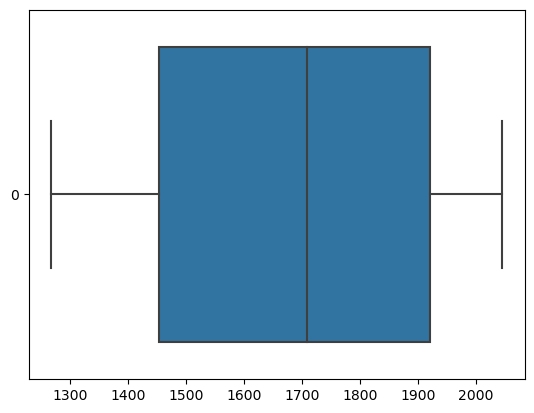

In [42]:
# preliminary exploration of outliers

sns.boxplot(merged_df['total_rainfall'], orient='h') 
# No outliers

<Axes: >

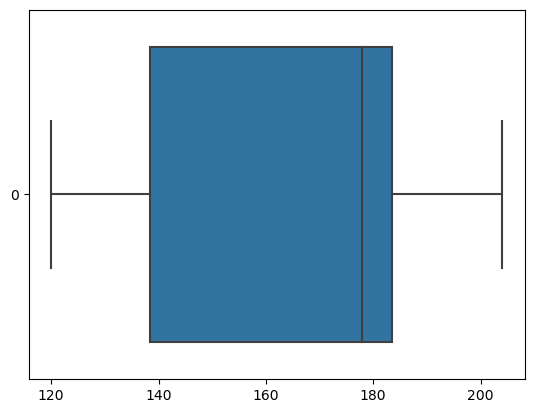

In [43]:
# find out if no_of_rainy_days has outliers

sns.boxplot(merged_df['no_of_rainy_days'], orient='h') 
# No outliers

<Axes: >

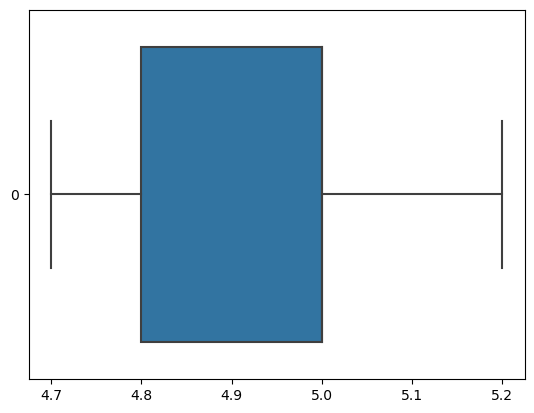

In [44]:
# find out if total_death_rate has outliers

sns.boxplot(merged_df['total_death_rate'], orient='h') 
# No outliers

<Axes: >

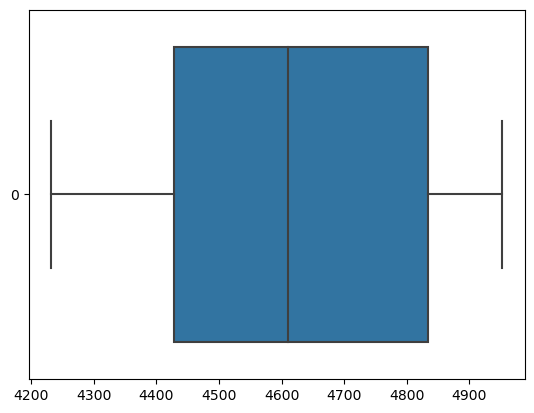

In [45]:
# find out if total_admissions has outliers

sns.boxplot(merged_df['respiratory_deaths'], orient='h') 
# No outliers

<Axes: >

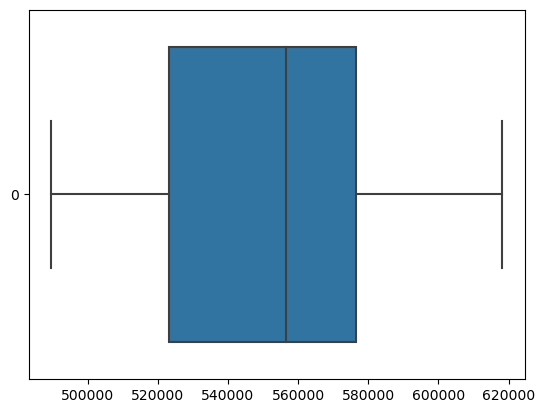

In [46]:
# find out if total_admissions has outliers

sns.boxplot(merged_df['total_admissions'], orient='h') 
# No outliers

<Axes: >

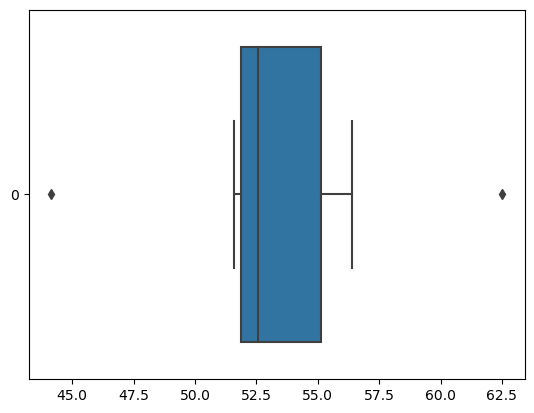

In [47]:
# find out if north has outliers

sns.boxplot(merged_df['north'], orient='h') 
# Yes outliers

In [48]:
# calculate north IQR
q1_north = 51.878368
q3_north = 55.126856
IQR_north = q3_north - q1_north
print(f' IQR: {IQR_north}')

# find the upper bound value 
right_quartile = q3_north + (1.5*IQR_north)
print(f' Upper bound: {right_quartile}')

# find the lower bound value
left_quartile = q1_north - (1.5*IQR_north)
print(f' Lower bound: {left_quartile}')

 IQR: 3.2484879999999947
 Upper bound: 59.99958799999999
 Lower bound: 47.00563600000001


<Axes: >

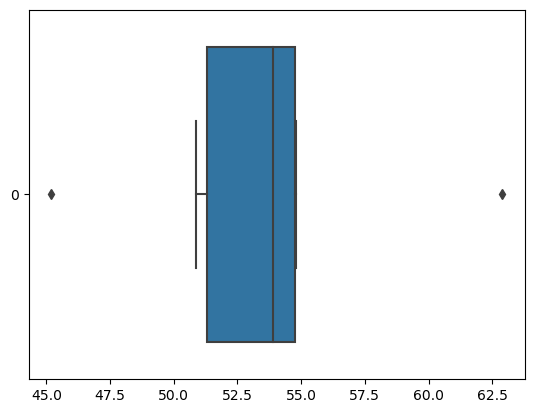

In [49]:
# find out if south has outliers

sns.boxplot(merged_df['south'], orient='h') 
# Yes outliers

In [50]:
# calculate south IQR
q1_south = 51.307838		
q3_south = 54.747500
IQR_south = q3_south - q1_south
print(f' IQR: {IQR_south}')

# find the upper bound value 
right_quartile2 = q3_south + (1.5*IQR_south)
print(f' Upper bound: {right_quartile2}')

# find the lower bound value
left_quartile2 = q1_south - (1.5*IQR_south)
print(f' Lower bound: {left_quartile2}')

 IQR: 3.4396620000000055
 Upper bound: 59.906993000000014
 Lower bound: 46.14834499999999


<Axes: >

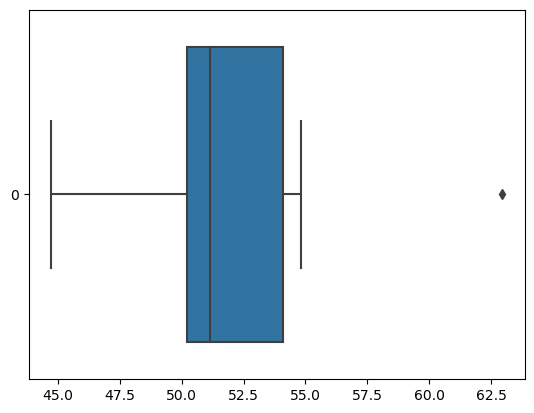

In [51]:
# find out if east has outliers

sns.boxplot(merged_df['east'], orient='h') 
# Yes outliers

In [52]:
# calculate east IQR
q1_east = 50.230167	
q3_east = 54.103444	
IQR_east = q3_east - q1_east
print(f' IQR: {IQR_east}')

# find the upper bound value 
right_quartile3 = q3_east + (1.5*IQR_east)
print(f' Upper bound: {right_quartile3}')

 IQR: 3.8732770000000016
 Upper bound: 59.913359500000006


<Axes: >

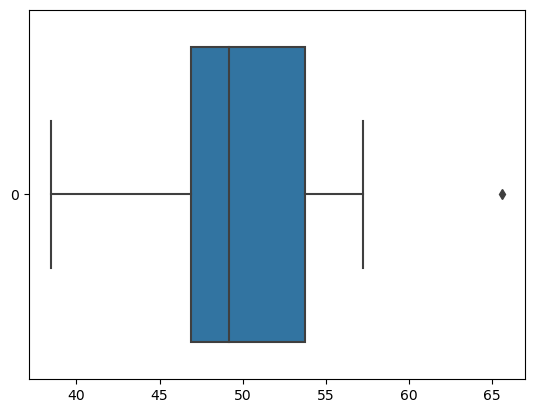

In [53]:
# find out if west has outliers

sns.boxplot(merged_df['west'], orient='h') 
# Yes outliers

In [54]:
# calculate west IQR
q1_west = 46.899543
q3_west = 53.736609
IQR_west = q3_west - q1_west
print(f' IQR: {IQR_west}')

# find the upper bound value 
right_quartile4 = q3_west + (1.5*IQR_west)
print(f' Upper bound: {right_quartile4}')

 IQR: 6.837066
 Upper bound: 63.992208000000005


<Axes: >

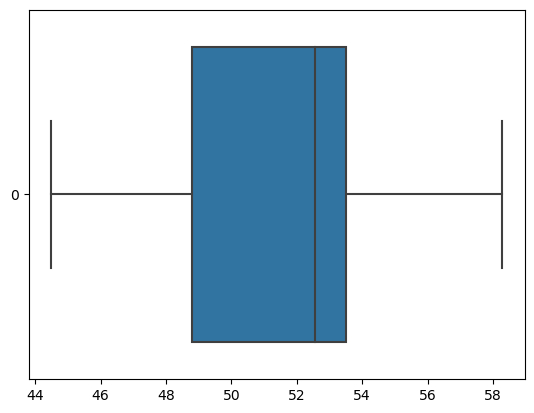

In [55]:
# find out if central has outliers

sns.boxplot(merged_df['central'], orient='h') 
# No outliers

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [56]:
# Changing 'year' to str type to prevent plotting 'year' in charts
merged_df['year'] = merged_df['year'].astype(str)

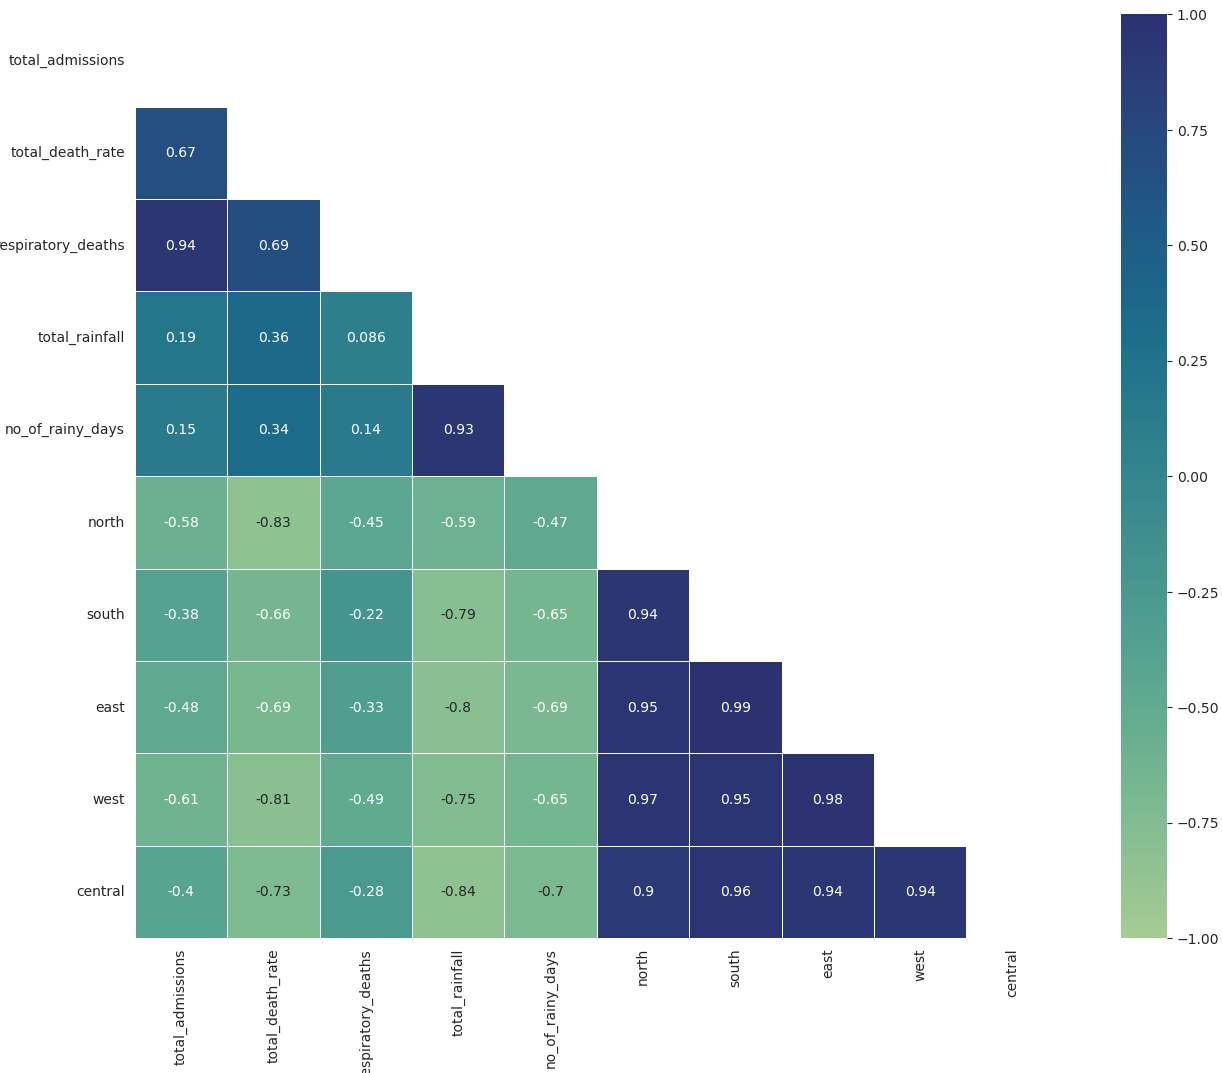

In [57]:
# find out correlation across the merged_df

plt.figure(figsize = (16,12))

# Get correlation of variables.
corr = merged_df.corr(numeric_only = True)

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='crest')

Interpretation:

- There is strong negative correlation between all regions of PSI levels and total death rate. Which means that, the PSI levels goes down as the total death rate increases. The same goes for PSI levels and the total rainfall and number of rainy days.
  
- There is a slight negative correlation between PSI levels and the total hospital admissions and respiratory deaths.

- And for obvious reasions, there is a strong correlations between total hospital admissions and respiratory deaths. As well as between total rainfall and number of rainy days. 

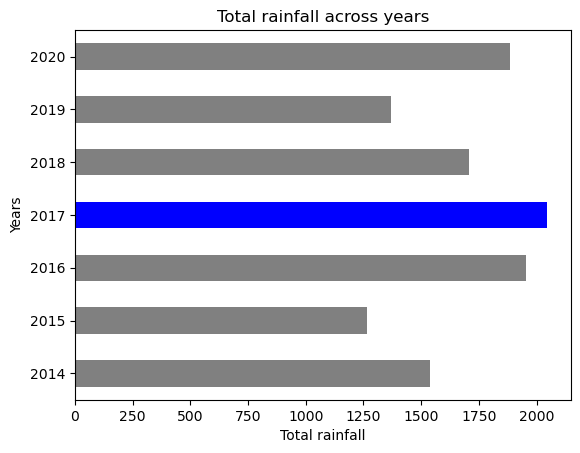

In [58]:
# Total rainfall across years
merged_df.groupby('year')['total_rainfall'].mean().plot(kind='barh',
                                                         color = ['grey','gray','gray','blue','gray','gray','gray','gray','gray','gray']);
plt.title("Total rainfall across years")
plt.xlabel("Total rainfall")
plt.ylabel("Years");

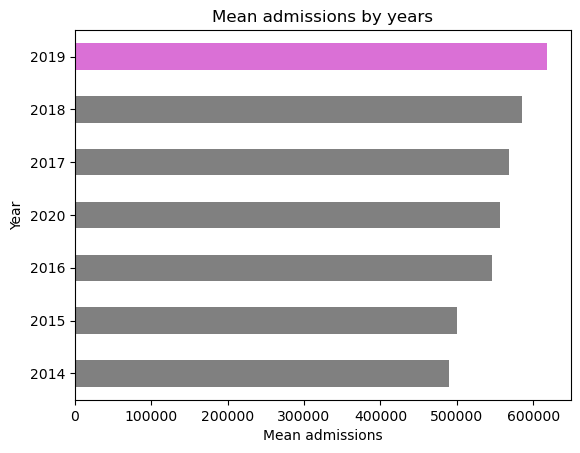

In [59]:
# study mean admissions by year
merged_df.groupby('year')['total_admissions'].mean().sort_values(ascending=True).plot.barh(color=['grey', 'grey','grey', 'grey','grey', 'grey','orchid'])
plt.title("Mean admissions by years")
plt.xlabel("Mean admissions")
plt.ylabel("Year");

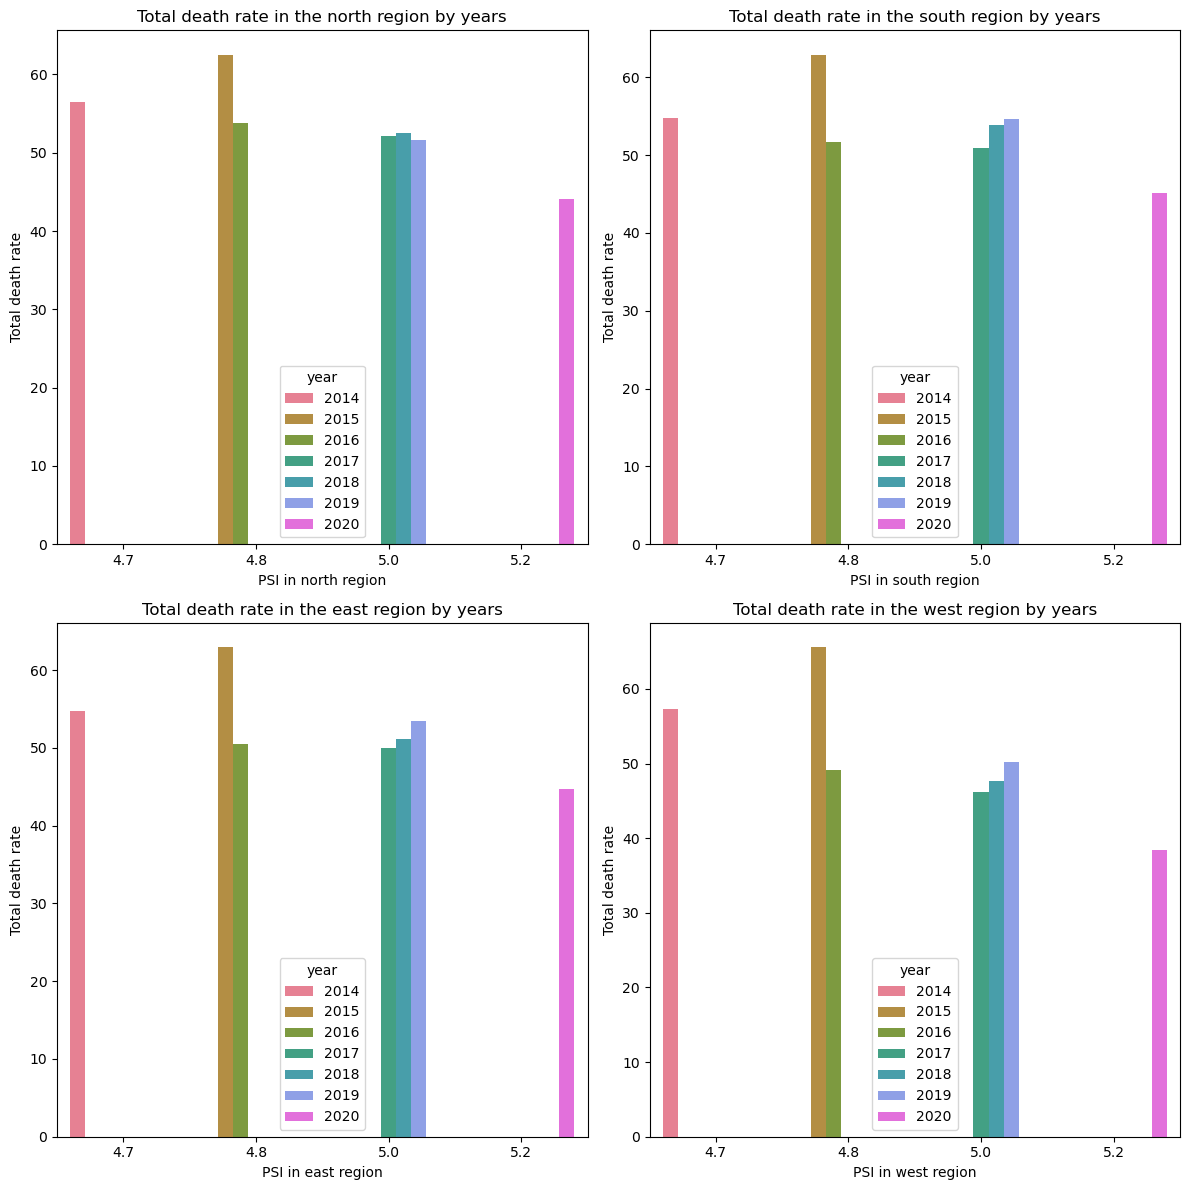

In [60]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot for the north region
sns.barplot(data=merged_df, x='total_death_rate', y='north', hue='year', palette='husl', ax=axes[0, 0])
axes[0, 0].set_ylabel('Total death rate')
axes[0, 0].set_xlabel('PSI in north region')
axes[0, 0].set_title('Total death rate in the north region by years')

# Plot for the south region
sns.barplot(data=merged_df, x='total_death_rate', y='south', hue='year', palette='husl', ax=axes[0, 1])
axes[0, 1].set_ylabel('Total death rate')
axes[0, 1].set_xlabel('PSI in south region')
axes[0, 1].set_title('Total death rate in the south region by years')

# Plot for the east region
sns.barplot(data=merged_df, x='total_death_rate', y='east', hue='year', palette='husl', ax=axes[1, 0])
axes[1, 0].set_ylabel('Total death rate')
axes[1, 0].set_xlabel('PSI in east region')
axes[1, 0].set_title('Total death rate in the east region by years')

# Plot for the west region
sns.barplot(data=merged_df, x='total_death_rate', y='west', hue='year', palette='husl', ax=axes[1, 1])
axes[1, 1].set_ylabel('Total death rate')
axes[1, 1].set_xlabel('PSI in west region')
axes[1, 1].set_title('Total death rate in the west region by years')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observation**:
Total death rate is consistent across various regions, indicating that there is not much variation in terms of mortality rates across different areas.

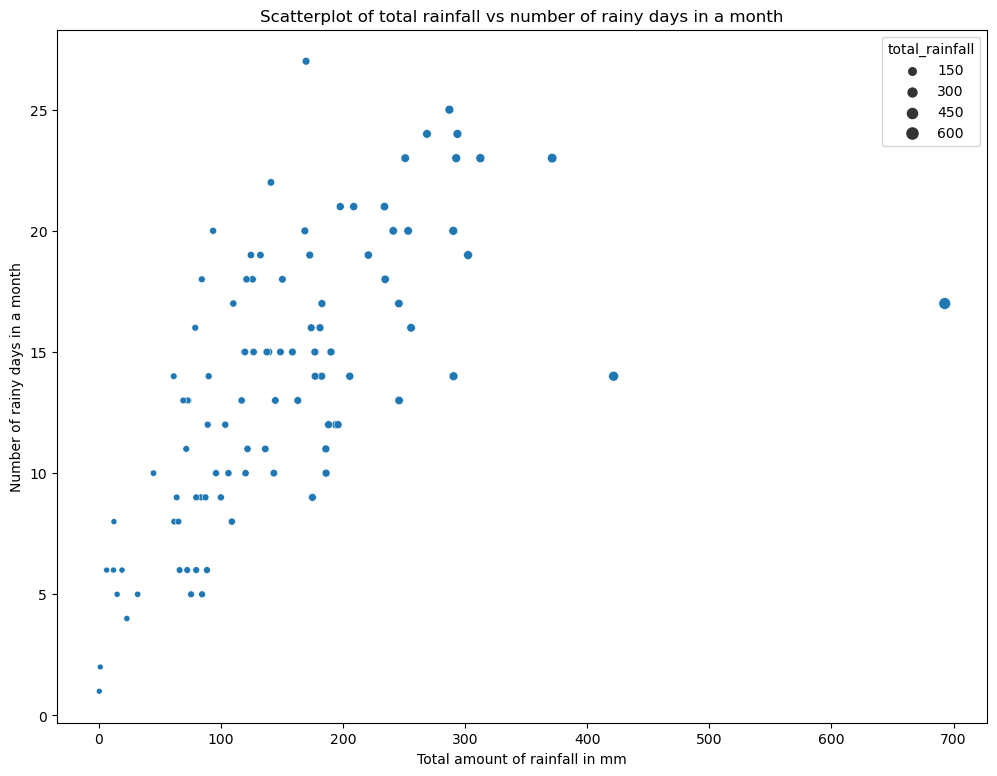

In [61]:
# find out how the number of rainy days and total rainfall correlates by season
plt.figure(figsize=(12,9))
sns.scatterplot(monthly_df, x='total_rainfall',y='no_of_rainy_days', size='total_rainfall')
plt.xlabel('Total amount of rainfall in mm')
plt.ylabel('Number of rainy days in a month')
plt.title('Scatterplot of total rainfall vs number of rainy days in a month')
plt.show();

**Observation**:
- There is a strong correlation between total amount of rainfall and number of rainy days.
- The pattern is consistent with a positive correlation. 
- Due to the data that is present, there are some erratic data that may not be representative. 

## Conclusions and Recommendations

**Conclusion**: 
In conclusion, our exploration of the correlation between rainy seasons and mortality rates, as well as hospital visits, has provided valuable insights for the Health Promotion Board. By understanding the relationship between rainy seasons and health outcomes, the Health Promotion Board can make informed decisions and develop targeted interventions to address potential health risks during these periods.

Our analysis highlights the importance of implementing preventive measures, allocating resources effectively, and developing appropriate health promotion campaigns during rainy seasons. By enhancing public awareness, strengthening healthcare infrastructure, and implementing targeted interventions, the Health Promotion Board can effectively mitigate the impact of adverse weather conditions on public health.

Overall, our findings provide a solid foundation for the Health Promotion Board to develop evidence-based strategies and interventions that will lead to improved health outcomes during rainy seasons.

**Recommendations:** 
Based on our analysis of the correlation between rainy seasons and mortality rates as well as hospital visits, we would like to provide the following recommendations to the Health Promotion Board:

- Enhance Public Awareness: Develop and implement public awareness campaigns to educate the population about the potential health risks associated with higher PSI level periods. Focus on promoting preventive measures and safety practices to reduce the impact of adverse weather conditions.

- Strengthen Healthcare Infrastructure: Allocate resources and strengthen the healthcare infrastructure, particularly in areas prone to higher mortality rates and increased hospital visits during rainy seasons. This includes ensuring sufficient healthcare facilities, medical personnel, and necessary equipment to handle the potential surge in demand.

- Targeted Interventions: Develop targeted interventions and initiatives specifically tailored to address health risks during rainy seasons. This could involve providing information on proper hygiene practices, immunizations, and appropriate medical care for common rainy season-related illnesses.

- Collaboration with Meteorological Agencies: Establish collaborations with meteorological agencies to obtain accurate and timely weather forecasts. This will enable the Health Promotion Board to proactively plan and respond to potential health risks associated with specific weather conditions during the rainy seasons.

- Data Monitoring and Analysis: Continuously monitor and analyze data related to mortality rates and hospital visits during rainy seasons. Identify trends and patterns to gain deeper insights into the specific health risks and challenges faced during these periods. This will facilitate evidence-based decision-making and targeted interventions.

- Community Engagement: Engage with the community through outreach programs and partnerships with local organizations. Encourage community participation in health promotion activities, disaster preparedness, and response plans during rainy seasons.

- Evaluation and Continuous Improvement: Regularly evaluate the effectiveness of interventions implemented during rainy seasons. Collect feedback from healthcare professionals, the community, and other stakeholders to identify areas for improvement and make necessary adjustments to strategies and campaigns.

By implementing these recommendations, the Health Promotion Board can effectively address potential health risks during rainy seasons, enhance public health outcomes, and ensure the well-being of the population.